In [58]:
#### Notebook for training Heart Failure Prediction Model #####

In [59]:
#### Packaages ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os

In [60]:
#### Load data ####
data = pd.read_csv("data/heart.csv")

In [61]:
#### Data cleaning ####
#Change non-numeric variables to numeric
data["Sex"] = data["Sex"].map({"M": 0, "F": 1})
data["ChestPainType"] = data["ChestPainType"].map({"TA": 0, "ATA": 1, "NAP": 2, "ASY": 3})
data["RestingECG"] = data["RestingECG"].map({"Normal": 0, "ST": 1, "LVH": 2})
data["ExerciseAngina"] = data["ExerciseAngina"].map({"N": 0, "Y": 1})
data["ST_Slope"] = data["ST_Slope"].map({"Flat": 0, "Up": 1, "Down": 2})



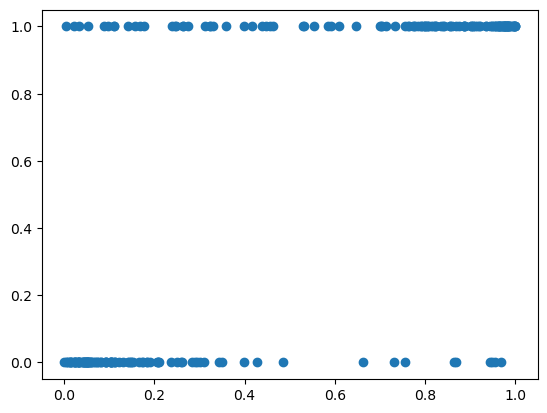

In [62]:
#### Model testing ####
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics

y = data["HeartDisease"]
X = data.drop("HeartDisease", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y)
clf = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    hidden_layer_sizes=[50,10],
                    solver="adam",
                    learning_rate="adaptive")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

#plot
plt.scatter(clf.predict_proba(X_test)[:,1],
            y_test)
plt.show()



In [63]:
#### Train on entire dataset ####
y = data["HeartDisease"]
X = data.drop("HeartDisease", axis=1)

model = MLPClassifier(random_state=1, 
                    max_iter=10000,
                    hidden_layer_sizes=[50,10],
                    solver="adam",
                    learning_rate="adaptive")
model.fit(X, y)

MLPClassifier(hidden_layer_sizes=[50, 10], learning_rate='adaptive',
              max_iter=10000, random_state=1)

In [64]:
#### Save model ####
with open("model/heart_failure_model.pkl", "wb") as f:
    pkl.dump(model, f)
